## More phenotypes
Add more phenotypes for each individual from the second table

In [1]:
import pandas as pd
import numpy as np
from extra_feature_mapping import rename_mapping
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

In [2]:
WAY_TO_NEW = "./data/finalochka_pheno.csv"
WAY_TO_OLD = "./data/FINAL_PHENO_ALL_LAUNCHES.tsv"

TABLE1_TO_MERGE = "data/pheno.csv"
TABLE2_TO_MERGE = "data/final_medical_21.09.2021.csv"

PHENOS_WITH_DIFFERENT_SEX = "./data/sex_diff.csv"  # we take the newest data from the second table, because it's double checked
PHENOS_WITH_DIFFERENT_DEATH = "./data/death_diff.csv"  # we take the newest data from the second table, because it's double checked
SAVE_EXTRA = "./data/extra_FINAL_PHENO_ALL_LAUNCHES.tsv"

In [3]:
new_data = pd.read_csv(WAY_TO_NEW)
new_data.head()

,№,Сиквенс,Мутации в гене ITGAM,rs мутации,Цитокины Биобанк,sCD40L pg/ml,Дата рождения,возраст,"Пол ( 1-м, 2-ж)",ЛЕЧЕНИЕ,Комп. № пац.-та,Unnamed: 11,Кашель,Одышка,Повышение температуры,Слабость,Потеря обонания и вкуса,Тяжесть в груди,Аллергологический анамнез:,Анамнез:,"Трансфузионная терапия, инъекции за последние 6 месяце и где выполнялись","Переносил ли инфекционные болезни (вирусные гепатиты, венерические заболевания, туберкулез, дизентерия, сыпной тиф, и др.) и когда",Был ли контакт с инфекционными больными,Покидали ли Вы Санкт-Петербург в ближайший месяц,"Не отмечали ли за последние 14 дней появление таких симптомов, как лихорадка (повышение температуры), кашель, слабость, жидкий стул","Если Вы проживаете не один, то здоровы ли Ваши близкие/родственники, 0 ли у них проявлений ""простуды"", т.е. лихорадки, кашля, слабости",Выезжал ли за последний год в эпид.опасные районы и за пределы РФ. Куда и когда,"Повышение температуры в данный момент и в течение предыдущего 1 месяца, если лихорадит, то с какого дня, тошнота, рвота, диарея",ИБС,АКС,ЦВБ,Состояние после инсульта,Состояние после инфаркта (ПИКС),СД,Рав.артрит (или другие автоиммуные заб),"Свежие операции (замена сустава или травмы), другое",ХБП 3-5,ХОБЛ,Бронхиальная астма,Хронический бронхит,Возраст ≤ 40 лет (0 баллов),Возраст 41–50 лет (1 балл),Возраст 51–60 лет (2 балла),Возраст 61–70 лет (3 балла),Возраст ≥71 лет (4 балла),"Инфаркт миокарда в анамнезе (0-нет, 1-да)","Застойная сердечная недостаточность (0-нет, 1-да)","Болезнь периферических артерий (0-нет, 1-да)","Цереброваскулярная болезнь (0-нет, 1-да)","Деменция (0-нет, 1-да)","Хроническое заболевание легких (0-нет, 1-да)","Заболевание соединительной ткани (0-нет, 1-да)","Язвенная болезнь (0-нет, 1-да)","Сахарный диабет (0-нет, 1-без поражения органов, 2-с поражением органов)","Поражение почек (0-нет, 2-да)","Гемиплегия или параплегия (0-нет, 2-да)","Лейкемия (0-нет, 2-да)","Лимфомы (0-нет, 2-да)","Злокачественное новообразование (0-нет, 2-любая злокачественная опухоль без метастазирования, 6-метастазирующая злокачественная опухоль)","Поражение печени (0-нет, 1-легкое, 3-умеренное или тяжелое","СПИД/ВИЧ (0-нет, 6-да)","Индекс коморбидности Чарлсона, общий балл","10-летняя выживаемость,% https://www.thecalculator.co/health/Charlson-Comorbidity-Index-(CCI)-Calculator-765.html","Диагноз заболевания по МКБ при выписке (1- U 07.1, 2- U 07.2, 3- Z01)","Степень тяжести заболевания (1-легкая, 2-средняя, 3-тяжелая и кр.тяжелая, 0-не болел)",Степень дыхательной недостаточности при поступлении,NEWS при поступлении (сумма баллов):,Степень дыхательной недостаточности к началу терапии,NEWS к началу терапии (сумма баллов):,Степень дыхательной недостаточности при выписке,NEWS при выписке (сумма баллов):,Форма забол. по КТ 1-4 при поступлении,1,2,Форма забол. по КТ 1-4 к началу терапии,1.1,2.1,Форма забол. по КТ 1-4 при выписке,1.2,2.2,КТ-признаки восстановления пневматизации в динамике,Гидроторакс,Дата заболевания,Дата поступления,Количество суток с начала заболевания до госпитализации,Дата начала антицитокиновой терапии (- если не применялась),Количество суток с начала заболевания до начала антицитокиновой терапии (- если не применялась),"Название антицитокинового препарата (1-тоцилизумаб, 2-тофацитиниб, 3-руксолитиниб, 4-RH104, 5-канакинумаб, 6-олокизумаб, 7-радотиниб, 8-барицитиниб, 9-левилимаб, - если не применялся)",Дата применения COVID-плазмы (- если не применялась),Количество суток с начала заболевания до начала применения COVID-плазмы (- если не применялась),Дата гемосорбции (- если не применялась),Количество суток с начала заболевания до начала гемосорбции (- если не применялась),Применение системных кортикостероидов (нет-0/да-1),Количество суток с начала заболевания до начала инв ИВЛ (- если не применялась),Количество суток с начала заболевания до начала ЭКМО (- если не применялась),Количество суток на ИВЛ,"Экстубация (да-1/нет-2, -, если не проводилась)",Дата проведения метода лечения,День заболевания,МазокПЦР1,Лейк1,Н

In [4]:
list(new_data.columns)

['№',
 'Сиквенс',
 'Мутации в гене ITGAM',
 'rs мутации',
 'Цитокины Биобанк',
 'sCD40L pg/ml',
 'Дата рождения',
 'возраст',
 'Пол ( 1-м, 2-ж)',
 'ЛЕЧЕНИЕ',
 'Комп. № пац.-та',
 'Unnamed: 11',
 'Кашель',
 'Одышка',
 'Повышение температуры',
 'Слабость',
 'Потеря обонания и вкуса',
 'Тяжесть в груди',
 'Аллергологический анамнез:',
 'Анамнез:',
 'Трансфузионная терапия, инъекции за последние 6 месяце и где выполнялись',
 'Переносил ли инфекционные болезни (вирусные гепатиты, венерические заболевания, туберкулез, дизентерия, сыпной тиф, и др.) и когда',
 'Был ли контакт с инфекционными больными',
 'Покидали ли Вы Санкт-Петербург в ближайший месяц',
 'Не отмечали ли за последние 14 дней появление таких симптомов, как лихорадка (повышение температуры), кашель, слабость, жидкий стул',
 'Если Вы проживаете не один, то здоровы ли Ваши близкие/родственники, 0 ли у них проявлений "простуды", т.е. лихорадки, кашля, слабости',
 'Выезжал ли за последний год в эпид.опасные районы и за пределы РФ. 

In [5]:
new_data.drop([0], inplace=True)

In [6]:
new_data.head()

,№,Сиквенс,Мутации в гене ITGAM,rs мутации,Цитокины Биобанк,sCD40L pg/ml,Дата рождения,возраст,"Пол ( 1-м, 2-ж)",ЛЕЧЕНИЕ,Комп. № пац.-та,Unnamed: 11,Кашель,Одышка,Повышение температуры,Слабость,Потеря обонания и вкуса,Тяжесть в груди,Аллергологический анамнез:,Анамнез:,"Трансфузионная терапия, инъекции за последние 6 месяце и где выполнялись","Переносил ли инфекционные болезни (вирусные гепатиты, венерические заболевания, туберкулез, дизентерия, сыпной тиф, и др.) и когда",Был ли контакт с инфекционными больными,Покидали ли Вы Санкт-Петербург в ближайший месяц,"Не отмечали ли за последние 14 дней появление таких симптомов, как лихорадка (повышение температуры), кашель, слабость, жидкий стул","Если Вы проживаете не один, то здоровы ли Ваши близкие/родственники, 0 ли у них проявлений ""простуды"", т.е. лихорадки, кашля, слабости",Выезжал ли за последний год в эпид.опасные районы и за пределы РФ. Куда и когда,"Повышение температуры в данный момент и в течение предыдущего 1 месяца, если лихорадит, то с какого дня, тошнота, рвота, диарея",ИБС,АКС,ЦВБ,Состояние после инсульта,Состояние после инфаркта (ПИКС),СД,Рав.артрит (или другие автоиммуные заб),"Свежие операции (замена сустава или травмы), другое",ХБП 3-5,ХОБЛ,Бронхиальная астма,Хронический бронхит,Возраст ≤ 40 лет (0 баллов),Возраст 41–50 лет (1 балл),Возраст 51–60 лет (2 балла),Возраст 61–70 лет (3 балла),Возраст ≥71 лет (4 балла),"Инфаркт миокарда в анамнезе (0-нет, 1-да)","Застойная сердечная недостаточность (0-нет, 1-да)","Болезнь периферических артерий (0-нет, 1-да)","Цереброваскулярная болезнь (0-нет, 1-да)","Деменция (0-нет, 1-да)","Хроническое заболевание легких (0-нет, 1-да)","Заболевание соединительной ткани (0-нет, 1-да)","Язвенная болезнь (0-нет, 1-да)","Сахарный диабет (0-нет, 1-без поражения органов, 2-с поражением органов)","Поражение почек (0-нет, 2-да)","Гемиплегия или параплегия (0-нет, 2-да)","Лейкемия (0-нет, 2-да)","Лимфомы (0-нет, 2-да)","Злокачественное новообразование (0-нет, 2-любая злокачественная опухоль без метастазирования, 6-метастазирующая злокачественная опухоль)","Поражение печени (0-нет, 1-легкое, 3-умеренное или тяжелое","СПИД/ВИЧ (0-нет, 6-да)","Индекс коморбидности Чарлсона, общий балл","10-летняя выживаемость,% https://www.thecalculator.co/health/Charlson-Comorbidity-Index-(CCI)-Calculator-765.html","Диагноз заболевания по МКБ при выписке (1- U 07.1, 2- U 07.2, 3- Z01)","Степень тяжести заболевания (1-легкая, 2-средняя, 3-тяжелая и кр.тяжелая, 0-не болел)",Степень дыхательной недостаточности при поступлении,NEWS при поступлении (сумма баллов):,Степень дыхательной недостаточности к началу терапии,NEWS к началу терапии (сумма баллов):,Степень дыхательной недостаточности при выписке,NEWS при выписке (сумма баллов):,Форма забол. по КТ 1-4 при поступлении,1,2,Форма забол. по КТ 1-4 к началу терапии,1.1,2.1,Форма забол. по КТ 1-4 при выписке,1.2,2.2,КТ-признаки восстановления пневматизации в динамике,Гидроторакс,Дата заболевания,Дата поступления,Количество суток с начала заболевания до госпитализации,Дата начала антицитокиновой терапии (- если не применялась),Количество суток с начала заболевания до начала антицитокиновой терапии (- если не применялась),"Название антицитокинового препарата (1-тоцилизумаб, 2-тофацитиниб, 3-руксолитиниб, 4-RH104, 5-канакинумаб, 6-олокизумаб, 7-радотиниб, 8-барицитиниб, 9-левилимаб, - если не применялся)",Дата применения COVID-плазмы (- если не применялась),Количество суток с начала заболевания до начала применения COVID-плазмы (- если не применялась),Дата гемосорбции (- если не применялась),Количество суток с начала заболевания до начала гемосорбции (- если не применялась),Применение системных кортикостероидов (нет-0/да-1),Количество суток с начала заболевания до начала инв ИВЛ (- если не применялась),Количество суток с начала заболевания до начала ЭКМО (- если не применялась),Количество суток на ИВЛ,"Экстубация (да-1/нет-2, -, если не проводилась)",Дата проведения метода лечения,День заболевания,МазокПЦР1,Лейк1,Н

In [7]:
features = [
    "возраст",
    "Пол ( 1-м, 2-ж)",
    "ЛЕЧЕНИЕ",
    "Комп. № пац.-та",
    "Индекс коморбидности Чарлсона, общий балл",
    "10-летняя выживаемость,% https://www.thecalculator.co/health/Charlson-Comorbidity-Index-(CCI)-Calculator-765.html",
    "Степень дыхательной недостаточности при поступлении",
    "NEWS при поступлении (сумма баллов):",
    "Степень дыхательной недостаточности к началу терапии",
    "NEWS к началу терапии (сумма баллов):",
    "Степень дыхательной недостаточности при выписке",
    "NEWS при выписке (сумма баллов):",
    "Форма забол. по КТ 1-4 при поступлении",
    "1",
    "2",
    "Форма забол. по КТ 1-4 к началу терапии",
    "1.1",
    "2.1",
    "Форма забол. по КТ 1-4 при выписке",
    "1.2",
    "2.2",
    "КТ-признаки восстановления пневматизации в динамике",
    "Дата заболевания",
    "Дата поступления",
    "Количество суток с начала заболевания до госпитализации",
    "Количество суток с начала заболевания до начала антицитокиновой терапии  (- если не применялась)",
    "Название антицитокинового препарата (1-тоцилизумаб, 2-тофацитиниб, 3-руксолитиниб, 4-RH104, 5-канакинумаб, 6-олокизумаб, 7-радотиниб, 8-барицитиниб, 9-левилимаб, - если не применялся)",
    "Количество суток с начала заболевания до начала применения COVID-плазмы (- если не применялась)",
    "Количество суток с начала заболевания до начала гемосорбции (- если не применялась)",
    "Применение системных кортикостероидов (нет-0/да-1)",
    "Количество суток с начала заболевания до начала инв ИВЛ  (- если не применялась)",
    "Количество суток с начала заболевания до начала ЭКМО (- если не применялась)",
    "Количество суток на ИВЛ",
    "МазокПЦР1",
    "Лейк1",
    "Нейтр1",
    "Л1",
    "ЛДГ1",
    "СРБ1",
    "Фер1",
    "Д-димер1",
    "ИЛ-6_1",
    "Креатинин1",
    "Глюкоза1",
    "МазокПЦР3",
    "Лейк3",
    "Нейтр3",
    "Л3",
    "ЛДГ3",
    "СРБ3",
    "Фер3",
    "Д-димер3",
    "ИЛ-6_3",
    "Креатинин3",
    "Глюкоза3",
    "Мазок ПЦР5",
    "Лейк5",
    "Нейтр5",
    "Л5",
    "ЛДГ5",
    "СРБ_5",
    "Фер_5",
    "Д-димер5",
    "ИЛ-6_5",
    "Креатинин5",
    "Глюкоза5",
    "Лейк7",
    "Нейтр7",
    "Л7",
    "ЛДГ7",
    "СРБ_7",
    "Фер_7",
    "Д-димер7",
    "ИЛ-6_7",
    "Креатинин7",
    "Глюкоза7",
    "Мазок ПЦР 9-10",
    "Прокальцитонин",
    "Исходы (1 умер, 2 выписка)",
    "Степень тяжести заболевания (1-легкая, 2-средняя, 3-тяжелая и кр.тяжелая, 0-не болел)",
    "Слабость",
    'Потеря обонания и вкуса',
    "Исходы заболевания(-1 умер, 0-продолжает лечение, 1 выписка)",
    "Койко-дней",
]

bacterias = [
    "Klebsiella pneumoniae (1-обнаружен, 0-не обнаружен, - не определялся)",
    "Staphylococcus aureus",
    "Acinetobacter baumannii",
    "Streptococcus mitis/Streptococcus oralis",
    "Staphylococcus haemolyticus",
    "Corynebacterium striatum",
    "Serratia marcescens",
    "Pseudomonas aeruginosa",
    "Neisseria flava",
    "Candida albicans",
    "Candida glabrata",
    "Acinetobacter pittii     ",
    "Candida tropicalis",
    "Streptococcus vestibularis",
    "Lactococcus lactis",
    "Streptococcus parasanguinis",
    "Stenotrophomonas maltophilia",
    "Hafnia alvei",
    "Streptococcus salivarius",
    "Staphylococcus epidermidis",
    "Citrobacter freundii",
    "Haemophilus influenzae",
    "Enterococcus faecium",
    "Escherichia coli",
    "Candida dubliniensis",
    "Candida spp",
    "Streptococcus salivarius ssp thermophilus",
    "Streptococcus pneumoniae",
    "Streptococcus sanguinis",
    "Gemella haemolysans",
    "Klebsiella variicola",
    "Rothia mucilaginosa",
    "Neisseria mucosa",
    "Candida parapsilosis",
    "Pseudomonas putida",
    "Enterobacter cloacae",
    "Klebsiella oxytoca",
    "Citrobacter amalonaticus",
    "Candida kefyr",
    "Enterobacter kobei",
    "Candida inconspicua",
    "Staphylococcus hominis",
    "Candida fermentati",
    "Pseudomonas fluorescens",
    "Bacteroides pyogenes",
    "Candida krusei",
    "Klebsiella aerogenes",
    "Moraxella catarrhalis (Branhamella catarrhalis)",
]

In [8]:
def isNaN(string):
    return string != string


# process data for information about detected bacterias
def check_bacterias(value):
    if str(value) == "0" or str(value) == "1":
        return value
    elif str(value) == "х" or str(value) == "х" or value == "-" or isNaN(value):
        return np.nan
    else:
        print(value, type(value))
        return np.nan

In [9]:
for col in bacterias:
    new_data[col] = new_data[col].apply(check_bacterias).astype(float)

x <class 'str'>
7/30/2020 <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
11/7/2020 <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
1/14/2021 <class 'str'>
x <class 'str'>
5/16/2020 <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
7/16/2020 <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
12/11/2020 <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
5/6/2020 <class 'str'>
5/4/2020 <class 

x <class 'str'>
x <class 'str'>
8/19/2020 <class 'str'>
x <class 'str'>
x <class 'str'>
11/3/2020 <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
07.12.2020, 10.12.2020 <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
10/3/2020 <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
11/5/2020 <class 'str'>
11/29/2020 <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class '

x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class

x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class

x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
5/4/2020 <class 'str'>
x

x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
12/11/2020 <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>
x <class 'str'>

## Agrregate information about bacterias

In [10]:
new_data["BACT_sum"] = new_data[bacterias].sum(axis=1)

In [11]:
## How many patients have at least one type of bacteria?

In [12]:
new_data["BACT_sum"][new_data["BACT_sum"] > 0].head()

1    3.0
2    2.0
4    3.0
7    1.0
8    1.0
Name: BACT_sum, dtype: float64

In [13]:
cols_to_leave = features + ["BACT_sum"]
new_data = new_data[cols_to_leave]
new_data.head()

,возраст,"Пол ( 1-м, 2-ж)",ЛЕЧЕНИЕ,Комп. № пац.-та,"Индекс коморбидности Чарлсона, общий балл","10-летняя выживаемость,% https://www.thecalculator.co/health/Charlson-Comorbidity-Index-(CCI)-Calculator-765.html",Степень дыхательной недостаточности при поступлении,NEWS при поступлении (сумма баллов):,Степень дыхательной недостаточности к началу терапии,NEWS к началу терапии (сумма баллов):,Степень дыхательной недостаточности при выписке,NEWS при выписке (сумма баллов):,Форма забол. по КТ 1-4 при поступлении,1,2,Форма забол. по КТ 1-4 к началу терапии,1.1,2.1,Форма забол. по КТ 1-4 при выписке,1.2,2.2,КТ-признаки восстановления пневматизации в динамике,Дата заболевания,Дата поступления,Количество суток с начала заболевания до госпитализации,Количество суток с начала заболевания до начала антицитокиновой терапии (- если не применялась),"Название антицитокинового препарата (1-тоцилизумаб, 2-тофацитиниб, 3-руксолитиниб, 4-RH104, 5-канакинумаб, 6-олокизумаб, 7-радотиниб, 8-барицитиниб, 9-левилимаб, - если не применялся)",Количество суток с начала заболевания до начала применения COVID-плазмы (- если не применялась),Количество суток с начала заболевания до начала гемосорбции (- если не применялась),Применение системных кортикостероидов (нет-0/да-1),Количество суток с начала заболевания до начала инв ИВЛ (- если не применялась),Количество суток с начала заболевания до начала ЭКМО (- если не применялась),Количество суток на ИВЛ,МазокПЦР1,Лейк1,Нейтр1,Л1,ЛДГ1,СРБ1,Фер1,Д-димер1,ИЛ-6_1,Креатинин1,Глюкоза1,МазокПЦР3,Лейк3,Нейтр3,Л3,ЛДГ3,СРБ3,Фер3,Д-димер3,ИЛ-6_3,Креатинин3,Глюкоза3,Мазок ПЦР5,Лейк5,Нейтр5,Л5,ЛДГ5,СРБ_5,Фер_5,Д-димер5,ИЛ-6_5,Креатинин5,Глюкоза5,Лейк7,Нейтр7,Л7,ЛДГ7,СРБ_7,Фер_7,Д-димер7,ИЛ-6_7,Креатинин7,Глюкоза7,Мазок ПЦР 9-10,Прокальцитонин,"Исходы (1 умер, 2 выписка)","Степень тяжести заболевания (1-легкая, 2-средняя, 3-тяжелая и кр.тяжелая, 0-не болел)",Слабость,Потеря обонания и вкуса,"Исходы заболевания(-1 умер, 0-продолжает лечение, 1 выписка)",Койко-дней,BACT_sum
1,57.0,1,"1, 4",627128.0,3.0,77.48,0,0,1,5,0,0,2,0,1,3,0,1,2,0,1,1,NaN,NaN,3,6,6,11,-,0,-,-,0,-,5.57,3.56,1.51,428,8.9,698.7,-,79.17,84,5.6,-,6.42,4.40,1.30,-,5.2,724.5,0.27,43.79,72,-,-,5.97,3.16,1.98,-,3.2,-,0.67,-,70,-,x,x,x,-,-,-,-,-,-,5.08,-,x,2,3,1,0,1,23,3.0
2,54.0,1,1,263742.0,2.0,90.15,0,4,0,5,0,0,1,0,1,2,0,1,2,0,1,1,NaN,NaN,4,-,-,5,-,0,-,-,0,36.0,4.24,1.93,1.71,-,20.8,580.6,0.15,21.06,78,6.6,-,4.57,1.96,1.92,-,31.5,547.6,-,20.1,-,-,-,5.14,2.39,1.89,-,-,-,-,15.62,-,-,5.67,2.59,2.06,-,-,673.5,-,6.13,NaN,NaN,-,x,2,2,1,1,1,17,2.0
3,69.0,2,1,633477.0,3.0,77.48,1,11,1,8,0,0,2,0,1,3,0,1,3,0,1,0,NaN,NaN,6,-,-,10,-,0,-,-,0,-,3.88,2.46,1.08,-,80.1,471.7,-,32.17,80,4.9,-,3.52,1.91,1.21,-,79.6,479.0,-,35.69,64,-,x,3.38,1.91,0.97,-,-,382.8,-,27.19,-,-,4.65,2.35,1.64,-,10.9,-,1.18,NaN,NaN,4.36,-,x,2,3,1,0,0,10,0.0
4,48.0,2,1,631577.0,1.0,95.87,2,6,2,8,0,0,2,0,1,3,0,1,3,0,1,0,NaN,NaN,13,-,-,19,-,0,-,-,0,-,6.23,4.32,1.50,-,44.7,NaN,-,20.27,55,-,-,6.89,5.32,1.15,-,56.3,851.3,-,29.6,-,-,x,6.14,4.29,1.25,-,-,-,-,22.86,-,-,x,x,x,-,-,-,-,NaN,NaN,NaN,-,x,2,3,1,0,0,11,3.0
5,45.0,2,1,633849.0,1.0,95.87,1,8,1,8,0,0,2,0,1,2,0,1,2,0,1,1,NaN,NaN,12,-,-,13,-,0,-,-,0,32.0,4.13,2.74,1.17,-,177.5,439.1,-,190.6,62,8.6,34.4,5.39,3.40,1.48,-,156.7,315.9,-,210.2,62,6.9,-,5.83,3.01,1.91,-,116.9,-,1.22,119.6,-,5.1,7.57,3.71,2.56,309,15.6,262.2,0.97,34.45,80,-,-,x,2,2,1,0,1,8,0.0


## Raname data to english abbreviations

In [14]:
renamed_data = new_data.rename(columns=rename_mapping)
renamed_data

,age,sex,treatment,man_id,com_index,ten_immortality,resp_dis_init,news_init,resp_dis_start,news_start,resp_dis_out,news_out,CT_init,ct1_init,ct2_init,CT_start,ct1_start,ct2_start,CT_out,ct1_out,ct2_out,CT_features,date_in,date_out,days_to_hosp,days_to_anticyt_treat,anticyt_treat,days_to_covid_plasma_treat,days_to_hemosorption,systemic_corticosteroids_usage,days_to_inv_IVL,days_to_EKMO,imv_days,pcr_1,leuk_1,neut_1,l_1,ldh_1,crp_1,fer_1,d_dym_1,il6_1,creat_1,glu_1,pcr_3,leuk_3,neut_3,l_3,ldh_3,crp_3,fer_3,d_dym_3,il6_3,creat_3,glu_3,pcr_5,leuk_5,neut_5,l_5,ldh_5,crp_5,fer_5,d_dym_5,il6_5,creat_5,glu_5,leuk_7,neut_7,l_7,ldh_7,crp_7,fer_7,d_dym_7,il6_7,creat_7,glu_7,pcr_9,pct,death,severity,weakness,smell_taste_loss,current_situation,days_at_hosp,BACT_sum
1,57.0,1,"1, 4",627128.0,3.0,77.48,0,0,1,5,0,0,2,0,1,3,0,1,2,0,1,1,NaN,NaN,3,6,6,11,-,0,-,-,0,-,5.57,3.56,1.51,428,8.9,698.7,-,79.17,84,5.6,-,6.42,4.40,1.30,-,5.2,724.5,0.27,43.79,72,-,-,5.97,3.16,1.98,-,3.2,-,0.67,-,70,-,x,x,x,-,-,-,-,-,-,5.08,-,x,2,3,1,0,1,23,3.0
2,54.0,1,1,263742.0,2.0,90.15,0,4,0,5,0,0,1,0,1,2,0,1,2,0,1,1,NaN,NaN,4,-,-,5,-,0,-,-,0,36.0,4.24,1.93,1.71,-,20.8,580.6,0.15,21.06,78,6.6,-,4.57,1.96,1.92,-,31.5,547.6,-,20.1,-,-,-,5.14,2.39,1.89,-,-,-,-,15.62,-,-,5.67,2.59,2.06,-,-,673.5,-,6.13,NaN,NaN,-,x,2,2,1,1,1,17,2.0
3,69.0,2,1,633477.0,3.0,77.48,1,11,1,8,0,0,2,0,1,3,0,1,3,0,1,0,NaN,NaN,6,-,-,10,-,0,-,-,0,-,3.88,2.46,1.08,-,80.1,471.7,-,32.17,80,4.9,-,3.52,1.91,1.21,-,79.6,479.0,-,35.69,64,-,x,3.38,1.91,0.97,-,-,382.8,-,27.19,-,-,4.65,2.35,1.64,-,10.9,-,1.18,NaN,NaN,4.36,-,x,2,3,1,0,0,10,0.0
4,48.0,2,1,631577.0,1.0,95.87,2,6,2,8,0,0,2,0,1,3,0,1,3,0,1,0,NaN,NaN,13,-,-,19,-,0,-,-,0,-,6.23,4.32,1.50,-,44.7,NaN,-,20.27,55,-,-,6.89,5.32,1.15,-,56.3,851.3,-,29.6,-,-,x,6.14,4.29,1.25,-,-,-,-,22.86,-,-,x,x,x,-,-,-,-,NaN,NaN,NaN,-,x,2,3,1,0,0,11,3.0
5,45.0,2,1,633849.0,1.0,95.87,1,8,1,8,0,0,2,0,1,2,0,1,2,0,1,1,NaN,NaN,12,-,-,13,-,0,-,-,0,32.0,4.13,2.74,1.17,-,177.5,439.1,-,190.6,62,8.6,34.4,5.39,3.40,1.48,-,156.7,315.9,-,210.2,62,6.9,-,5.83,3.01,1.91,-,116.9,-,1.22,119.6,-,5.1,7.57,3.71,2.56,309,15.6,262.2,0.97,34.45,80,-,-,x,2,2,1,0,1,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,27.0,1,"Этиотропная терапия, ранее Невосприимчивые",628690.0,0.0,98.30,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,8/30/2021,9/1/2021 1:44,2,-,-,-,-,0,-,-,0,-,9.62,5.93,2.77,178,1.4,89.3,0.27,2.21,86,NaN,NaN,7.9,5.47,1.62,NaN,NaN,63.4,0.27,1.52,87,NaN,NaN,NaN,5.47,NaN,NaN,0.5,NaN,0.73,NaN,68,NaN,8.03,4.93,2.01,167,0.6,77.5,0.27,1.77,93,NaN,NaN,0.037,2,2,1,1,1,13,0.0
975,74.0,1,2,662529.0,9.0,0.00,0,0,0,0,2,17,0,0,0,1,0,1,1,0,1,-1,8/25/2020,8/25/2020 17:55,1,14,8,-,-,0,-,-,0,22.7,11.4,10.22,0.89,NaN,NaN,0,NaN,33.75,81,NaN,NaN,7.96,6.95,0.8,NaN,NaN,NaN,3.42,63.85,75,NaN,35,NaN,NaN,NaN,NaN,52.1,NaN,NaN,43.16,NaN,NaN,10.22,4.6,0.93,NaN,76.5,NaN,NaN,93.79,NaN,NaN,-,NaN,1,2,1,0,-1,22,0.0
976,64.0,2,Этиотропная терапия,664466.0,4.0,53.39,1,1,1,1,0,0,1,1,0,1,1,0,0,0,0,1,8/24/2020,8/24/2020 23:19,1,-,-,-,-,0,-,-,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,0,0,1,13,0.0
977,74.0,2,Этиотропная терапия,698959.0,9.0,0.00,0,0,0,0,0,0,0,1,2,3,4,5,6,7,8,9,2/3/2021,2/8/2021 17:26,6,-,-,-,-,0,-,-,0,32.0,4,2.51,0.88,NaN,0.2,58.8,0.83,x,75,6,x,x,x,x,x,x,x,x,x,x,x,28.0,x,x,x,x,x,x,x,x,x,x,1.93,0.76,0.89,x,0.6,x,x,5.14,62,4.45,-,NaN,2,2,1,0,1,11,0.0


In [15]:
renamed_data[renamed_data.severity=='0']

,age,sex,treatment,man_id,com_index,ten_immortality,resp_dis_init,news_init,resp_dis_start,news_start,resp_dis_out,news_out,CT_init,ct1_init,ct2_init,CT_start,ct1_start,ct2_start,CT_out,ct1_out,ct2_out,CT_features,date_in,date_out,days_to_hosp,days_to_anticyt_treat,anticyt_treat,days_to_covid_plasma_treat,days_to_hemosorption,systemic_corticosteroids_usage,days_to_inv_IVL,days_to_EKMO,imv_days,pcr_1,leuk_1,neut_1,l_1,ldh_1,crp_1,fer_1,d_dym_1,il6_1,creat_1,glu_1,pcr_3,leuk_3,neut_3,l_3,ldh_3,crp_3,fer_3,d_dym_3,il6_3,creat_3,glu_3,pcr_5,leuk_5,neut_5,l_5,ldh_5,crp_5,fer_5,d_dym_5,il6_5,creat_5,glu_5,leuk_7,neut_7,l_7,ldh_7,crp_7,fer_7,d_dym_7,il6_7,creat_7,glu_7,pcr_9,pct,death,severity,weakness,smell_taste_loss,current_situation,days_at_hosp,BACT_sum
656,41.0,1,Этиотропная терапия,625668.0,0.0,98.30,легкая,3,1,4,0,0,0,0,0,0,0,0,0,0,0,0,4/25/2020,28.04.2020 01:00,3,-,-,-,-,0,0,NaN,0,23,3.22,NaN,NaN,NaN,1.4,NaN,NaN,NaN,77,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,0,0,1,4,0.0
673,65.0,2,Этиотропная терапия,308326.0,4.0,53.39,средняя,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,4/26/2020,04.05.2020 20:52,9,-,-,-,-,0,-,-,0,NaN,4.56,3.17,1.05,288,21,331.1,0,NaN,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.03,8.29,NaN,NaN,NaN,NaN,2,0,1,1,1,18,0.0
680,47.0,1,Этиотропная терапия,627525.0,1.0,95.87,NaN,4,1,4,0,0,1,1,0,1,1,0,1,1,0,1,5/2/2020,05.05.2020 21:36,4,-,-,-,-,0,-,-,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.6,4.9,3.86,0.66,195,72.9,381.7,0.94,NaN,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,1,0,1,16,0.0
685,28.0,2,Невосприимчивые,627703.0,0.0,98.30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-,-,-,-,0,-,-,0,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,0,0,0,x,0,0.0
751,53.0,1,Невосприимчивые,526159.0,2.0,90.15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-,-,-,-,0,-,-,0,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,0,0,0,x,0,0.0
752,43.0,1,Невосприимчивые,415050.0,1.0,95.87,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-,-,-,-,0,-,-,0,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,0,0,0,x,0,0.0
756,43.0,2,Невосприимчивые,94893.0,1.0,95.87,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-,-,-,-,0,-,-,0,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,0,0,0,x,0,0.0
759,52.0,1,Невосприимчивые,318179.0,1.0,95.87,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-,-,-,-,0,-,-,0,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,0,0,0,x,NaN,0.0
764,54.0,1,Невосприимчивые,245509.0,4.0,53.39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-,-,-,-,0,-,-,0,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,0,0,0,x,0,0.0
770,57.0,1,Невосприимчивые,486465.0,2.0,90.15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-,-,-,-,0,-,-,0,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,0,0,0,x,0,0.0


Those, who have analyses, should have  nans in severity, otherwise - 0

In [16]:
sev_indexes = [656, 673, 680]
for i in sev_indexes:
    renamed_data.at[i,'severity'] = np.nan
# renamed_data[renamed_data.severity=='0']

In [18]:
# Outcomes
# Previously: 1 - dead, 2 - alive
# Required: 1 - dead, 0 - alive
def get_death(x):
    try:
        x = int(x)
        x = x * (-1) + 2
        if x == 1 or x == 0:
            return x
        else:
            return np.nan
    except ValueError:
        print(f"death error: {x}")
        #         de+=1
        return np.nan


# Sex
# Was: 1 - m, 2 - f
# Need 0 - m, 1 - f
def get_sex(x):
    #     print(x)
    try:
        if int(x) == 2:
            return 1
        if int(x) == 1:
            return 0
        else:
            return np.nan
    except ValueError:
        print(f"sex error: {x}")
        #         sx+=1
        return np.nan
    
    
def get_severity(x):
    try:
        x = int(round(float(x)))
        if 0 <= x <= 3:
            return x
        else:
            return np.nan
    except ValueError:
        print(f"sev error: {x}")
        return np.nan



# bed days - days_at_hosp
# IVL - check_imv_days
def check_floats(x):
    starting_x = x
    try:
        return float(x)
    except (ValueError, TypeError):
        pass
    try:
        x = x.replace("\n", "").replace("\xa0", " ").replace(" ", "")
        return float(x)
    except (ValueError, TypeError):
        pass
    try:
        if "," in x and "." in x:
            return float(x.replace(",", ""))
        return float(x.replace(",", "."))
    except (ValueError, TypeError):
        pass
    print(f"num error: {starting_x, x}")
    return np.nan

Using these functions, transform fetures
+ sex, death, age, severity - transorm as we need (check comments of functions)
+ For strange values (that are not floats) -> nans

In [19]:
int_cols = ["man_id"]
specific_cols = ["sex", "death", "severity"]
dont_check_cols = ["treatment", "date_in", "date_out", "isc_diagn"]
other_columns = list(set(renamed_data.columns) - set(int_cols) - set(dont_check_cols))

In [20]:
for col in int_cols:
    renamed_data[col] = renamed_data[col].astype(int)
renamed_data.death = renamed_data.death.apply(get_death)
renamed_data.sex = renamed_data.sex.apply(get_sex)
renamed_data.severity = renamed_data.severity.apply(get_severity)
for col in other_columns:
    print(col)
    renamed_data[col] = renamed_data[col].apply(check_floats)

death error: x
death error: x
death error: x
death error: x
death error: x
death error: x
death error: x
death error: x
death error: x
death error: x
death error: x
death error: x
death error: x
death error: x
death error: x
death error: x
death error: x
death error: x
death error: x
death error: x
death error: x
death error: x
death error: x
death error: x
death error: x
death error: x
death error: x
death error: x
death error: x
sev error: nan
sev error: nan
sev error: nan
sev error: nan
days_to_inv_IVL
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num e

d_dym_5
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
nu

creat_7
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('x', 'x')
num error: ('-', '-')
num error: ('x', 'x')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('-', '-')
num error: ('-', '-')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('-', '-')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
nu

BACT_sum
leuk_7
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x',

CT_features
num error: ('-', '-')
num error: ('-', '-')
num error: ('x', 'x')
num error: ('-', '-')
num error: ('-', '-')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
CT_out
num error: ('-', '-')
num error: ('-', '-')
num error: ('x', 'x')
num error: ('-', '-')
num error: ('x', 'x')
num error: ('-', '-')
num error: ('-', '-')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('x', 'x')
num error: ('нет данных', 'нетданных')
pcr_1
num error: ('-', '-')
num error: ('-', '-')
num error: ('-', '-')
num error: ('x', 'x')
num error: ('-', '-')
num error: ('-', '-')
num error: (

## Merging with old phenos

In [21]:
old_data = pd.read_csv(WAY_TO_OLD, sep="\t")
old_data

,launch_id,launch_blood_id,man_id,age,sex,death,severity,storm,ill_to_hosp,days_at_hosp,temp,weakness,smell_taste_loss,chd,aks,cvd,imv_days,pcr_1,leuk_1,neut_1,l_1,ldh_1,crp_1,fer_1,d_dym_1,il6_1,creat_1,glu_1,pcr_3,leuk_3,neut_3,l_3,ldh_3,crp_3,fer_3,d_dym_3,il6_3,creat_3,glu_3,pcr_5,leuk_5,neut_5,l_5,ldh_5,crp_5,fer_5,d_dym_5,il6_5,creat_5,glu_5,leuk_7,neut_7,l_7,ldh_7,crp_7,fer_7,d_dym_7,il6_7,creat_7,glu_7,pcr_9,pct,news_1,resp_fail_5,news_5,resp_fail_out,news_out,il6,crp,leuk,neut,l,ldh,fer,d_dym,creat,glu,pcr,il6_dynam,crp_dynam,leuk_dynam,neut_dynam,l_dynam,ldh_dynam,fer_dynam,d_dym_dynam,creat_dynam,glu_dynam,pcr_dynam,news_dynam
0,10,104555,597619,23.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,1046472,263436,52.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,1046474,695634,66.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,1046475,694025,50.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,1046476,74079,62.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,11,114118,660644,57.0,0.0,NaN,2.0,1.0,8.0,29.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,36.00,4.55,2.28,1.73,673.0,37.8,803.1,NaN,171.90,56.0,4.76,NaN,7.76,6.14,1.32,NaN,37.3,753.4,NaN,109.00,59.0,NaN,NaN,6.71,5.48,0.86,NaN,8.9,NaN,NaN,157.50,NaN,NaN,6.61,5.15,1.05,NaN,2.5,NaN,NaN,127.70,NaN,NaN,NaN,NaN,6.0,3.0,11.0,0.0,2.0,171.90,37.8,7.76,6.14,1.73,673.0,803.1,NaN,59.0,4.76,36.00,-44.20,-35.3,2.06,2.87,-0.68,0.0,-49.7,NaN,3.0,0.00,0.00,-4.0
836,11,114119,660141,52.0,0.0,NaN,2.0,1.0,7.0,10.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,26.80,5.56,3.49,1.78,NaN,69.0,402.0,0.69,47.18,62.0,4.59,34.7,7.22,5.53,1.40,NaN,161.4,300.0,1.52,138.50,64.0,10.34,NaN,NaN,NaN,1.46,NaN,223.8,734.2,2.27,31.33,54.0,6.01,NaN,NaN,1.88,NaN,72.9,461.8,NaN,6.58,53.0,5.53,NaN,0.052,4.0,1.0,5.0,0.0,0.0,138.50,223.8,7.22,5.53,1.88,NaN,734.2,2.27,64.0,10.34,26.80,-40.60,3.9,1.66,2.04,0.10,NaN,59.8,1.58,-9.0,0.94,7.90,-4.0
837,11,114120,29478,65.0,0.0,NaN,2.0,1.0,3.0,9.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,28.90,NaN,7.60,1.45,353.0,31.7,347.3,NaN,16.06,NaN,NaN,NaN,NaN,NaN,1.88,NaN,19.9,337.9,0.76,5.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [22]:
new_id = set(renamed_data.man_id)
old_id = set(old_data.man_id)

In [23]:
len(new_id), len(old_id), len(old_id & new_id)

(977, 840, 838)

In [24]:
old_columns = old_data.columns
new_columns = renamed_data.columns
common_columns = set(old_columns) & set(new_columns) - set(["man_id"])
common_columns

{'age',
 'creat_1',
 'creat_3',
 'creat_5',
 'creat_7',
 'crp_1',
 'crp_3',
 'crp_5',
 'crp_7',
 'd_dym_1',
 'd_dym_3',
 'd_dym_5',
 'd_dym_7',
 'days_at_hosp',
 'death',
 'fer_1',
 'fer_3',
 'fer_5',
 'fer_7',
 'glu_1',
 'glu_3',
 'glu_5',
 'glu_7',
 'il6_1',
 'il6_3',
 'il6_5',
 'il6_7',
 'imv_days',
 'l_1',
 'l_3',
 'l_5',
 'l_7',
 'ldh_1',
 'ldh_3',
 'ldh_5',
 'ldh_7',
 'leuk_1',
 'leuk_3',
 'leuk_5',
 'leuk_7',
 'neut_1',
 'neut_3',
 'neut_5',
 'neut_7',
 'news_out',
 'pcr_1',
 'pcr_3',
 'pcr_5',
 'pcr_9',
 'pct',
 'severity',
 'sex',
 'smell_taste_loss',
 'weakness'}

Almost every from old, has new info

In [25]:
old_data.columns = [
    "old__" + col if col in common_columns else col for col in old_data.columns
]
renamed_data.columns = [
    "new__" + col if col in common_columns else col for col in renamed_data.columns
]

In [26]:
merged_data = pd.merge(old_data, renamed_data, on="man_id", how="left")

## Merge intersected cols

In [27]:
def return_second_if_not_nan(a, b):
    if not np.isnan(b):
        return b
    if not np.isnan(a):
        return a
    return b

In [28]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

d1 = pd.read_csv(TABLE1_TO_MERGE)
d2 = pd.read_csv(TABLE2_TO_MERGE)

#### Different sex
Some individuals have different sex in different tables. We take the newest data from the second table - it is the most up-to-date and double-checked data.

In [29]:
merged_data[
    (merged_data.old__sex != merged_data.new__sex)
    & ~(merged_data.old__sex.isna() | merged_data.new__sex.isna())
][["old__sex", "new__sex", "man_id"]].to_csv(PHENOS_WITH_DIFFERENT_SEX)
sex_id = merged_data[
    (merged_data.old__sex != merged_data.new__sex)
    & ~(merged_data.old__sex.isna() | merged_data.new__sex.isna())
][["old__sex", "new__sex", "man_id"]].man_id

In [30]:
d1[d1["КАРТА ПАЦ-ТА"].isin(sex_id)][["Пол ( 1-м, 2-ж)", "КАРТА ПАЦ-ТА"]].sort_values(
    "КАРТА ПАЦ-ТА"
).head()

,"Пол ( 1-м, 2-ж)",КАРТА ПАЦ-ТА
738,2,78072.0
109,2,83547.0
198,2,89544.0
258,2,93589.0
136,2,96034.0


In [31]:
d2[d2["Комп. № пац.-та"].isin(sex_id)][
    ["Пол ( 1-м, 2-ж)", "Комп. № пац.-та"]
].sort_values("Комп. № пац.-та").head()

,"Пол ( 1-м, 2-ж)",Комп. № пац.-та
841,2,78072.0
523,2,83547.0
10,2,89544.0
53,2,93589.0
481,2,96034.0


In [32]:
merged_data["sex"] = merged_data.apply(
    lambda x: return_second_if_not_nan(x.old__sex, x.new__sex), axis=1
)
merged_data = merged_data.drop(["old__sex", "new__sex"], axis=1)

#### Different death
Some individuals have different death in different tables. We take the newest data from the second table - it is the most up-to-date and double-checked data.

In [33]:
merged_data[
    (merged_data.old__death != merged_data.new__death)
    & ~(merged_data.old__death.isna() | merged_data.new__death.isna())
][["old__death", "new__death", "man_id"]].to_csv(PHENOS_WITH_DIFFERENT_DEATH)
death_id = merged_data[
    (merged_data.old__death != merged_data.new__death)
    & ~(merged_data.old__death.isna() | merged_data.new__death.isna())
][["old__death", "new__death", "man_id"]].man_id

In [34]:
merged_data["death"] = merged_data.apply(
    lambda x: return_second_if_not_nan(x.old__death, x.new__death), axis=1
)
merged_data = merged_data.drop(["old__death", "new__death"], axis=1)

l_3


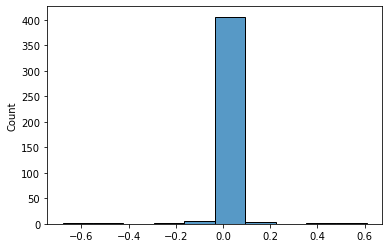

fer_3


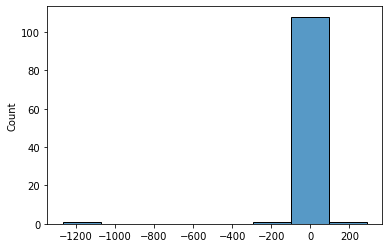

ldh_7


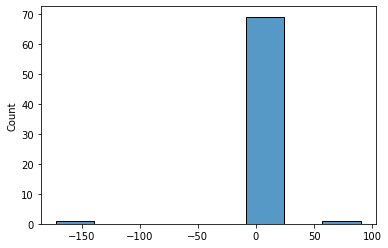

neut_3


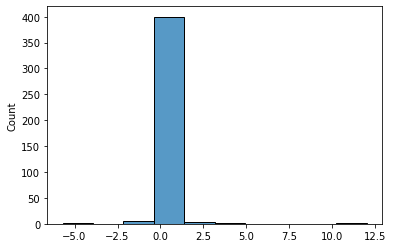

neut_7


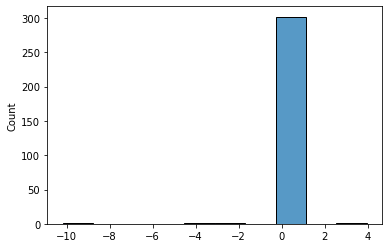

creat_7


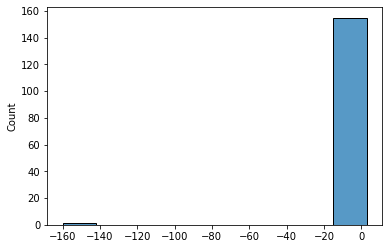

glu_1


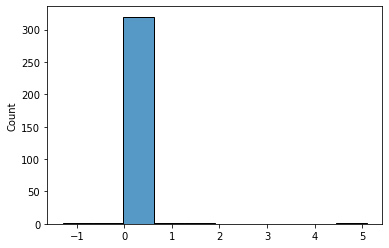

smell_taste_loss


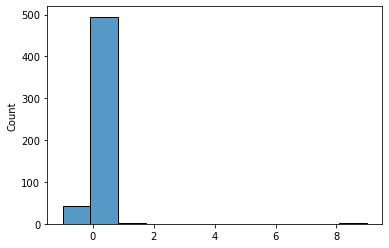

pct


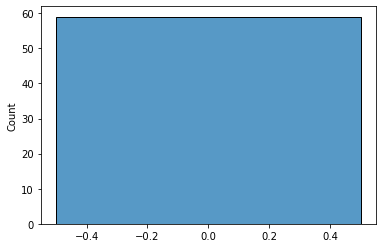

fer_5


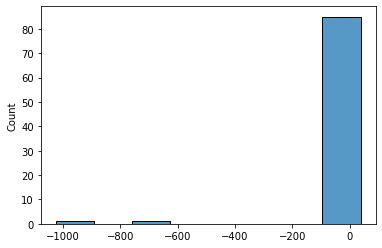

il6_7


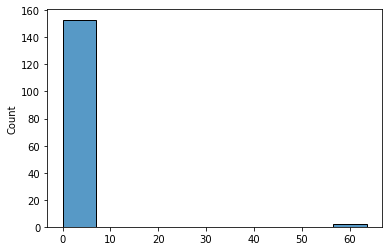

leuk_7


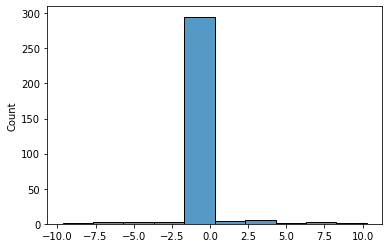

l_7


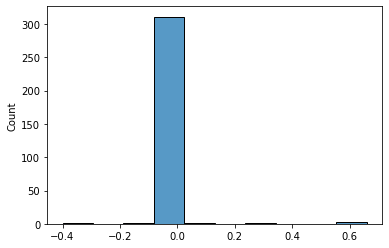

fer_7


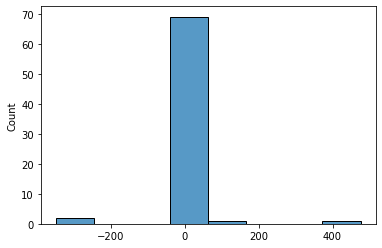

d_dym_7


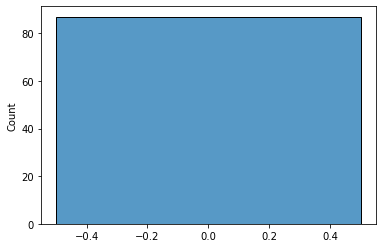

creat_1


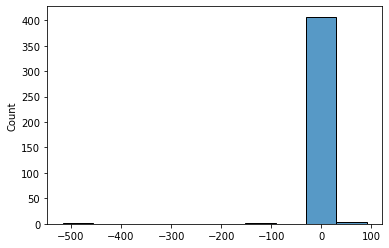

leuk_3


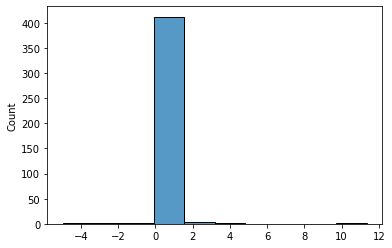

il6_3


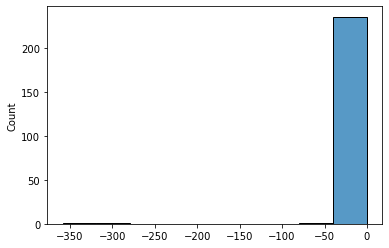

neut_5


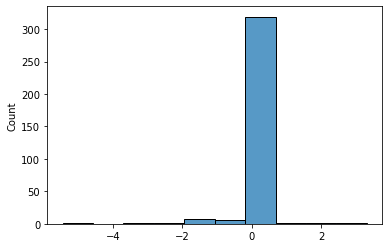

weakness


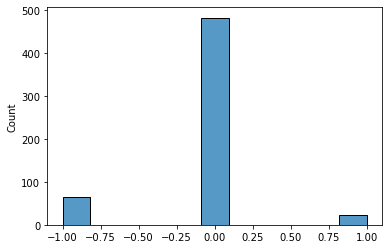

pcr_9


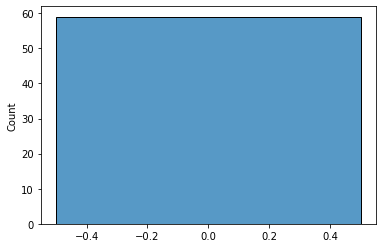

glu_5


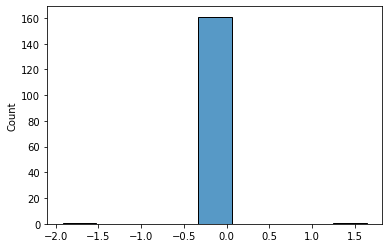

l_5


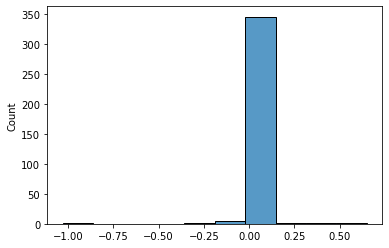

d_dym_5


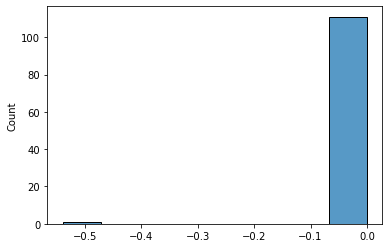

leuk_1


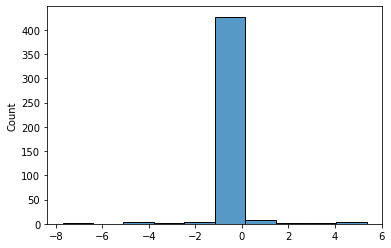

il6_5


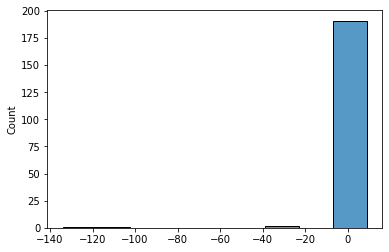

crp_1


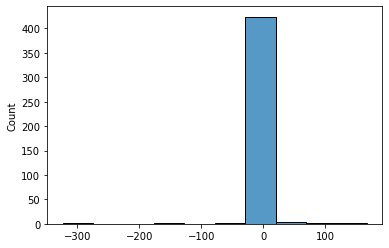

l_1


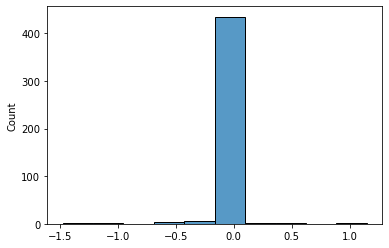

age


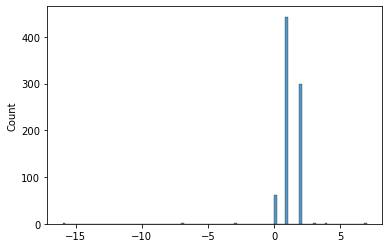

pcr_3


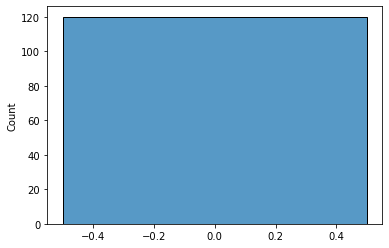

severity


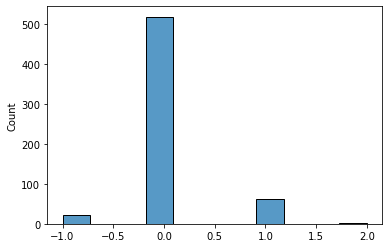

glu_3


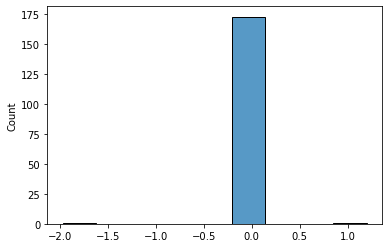

crp_5


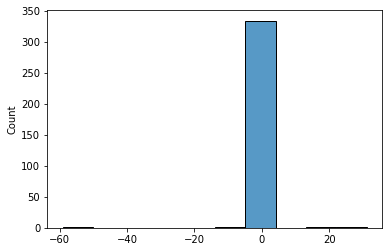

d_dym_1


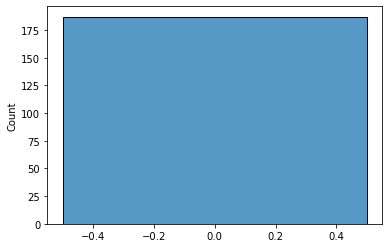

neut_1


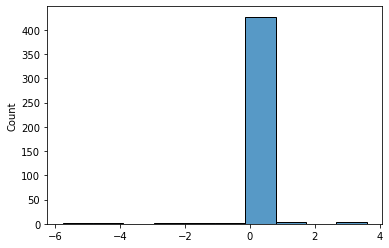

news_out


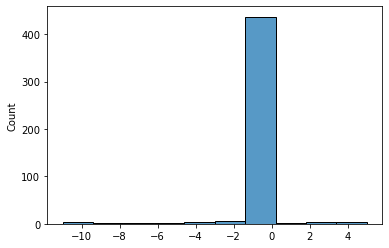

ldh_1


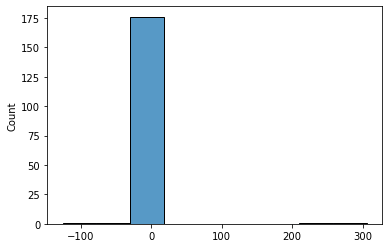

pcr_5


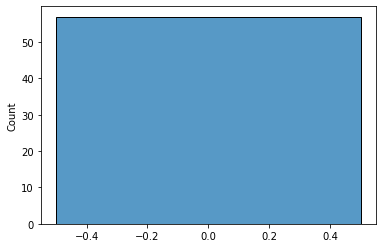

glu_7


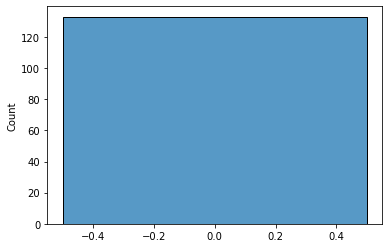

pcr_1


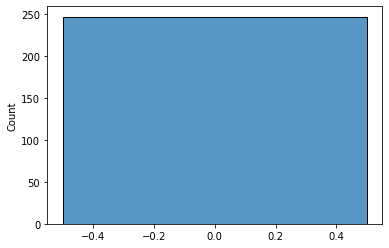

il6_1


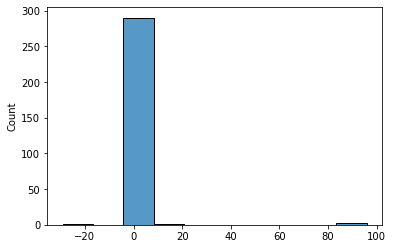

creat_5


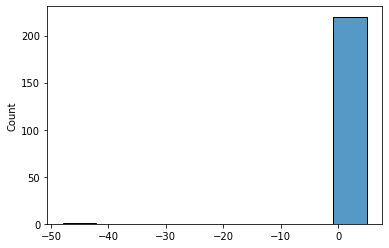

imv_days


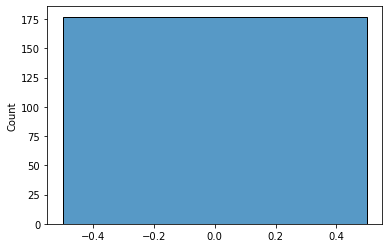

d_dym_3


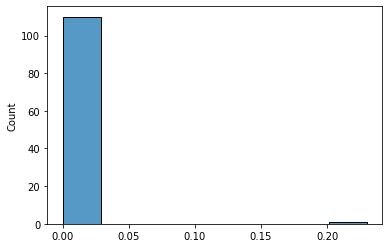

ldh_3


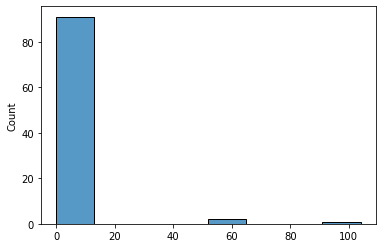

crp_3


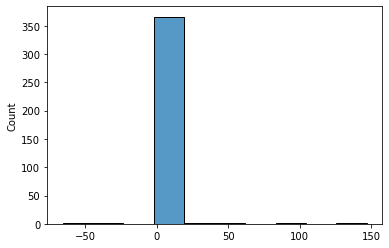

creat_3


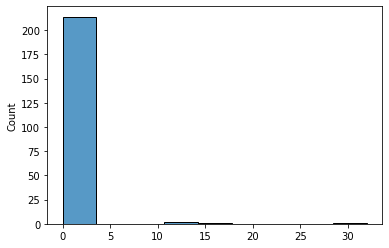

crp_7


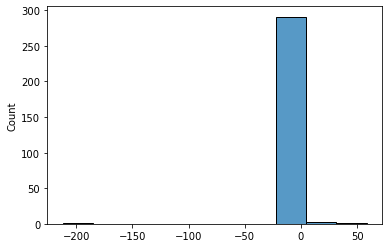

ldh_5


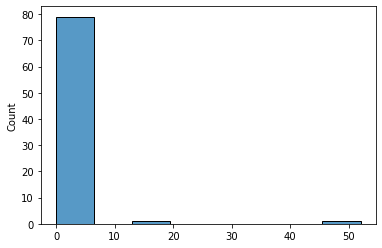

leuk_5


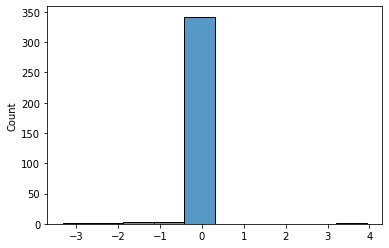

fer_1


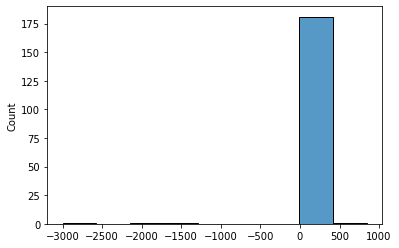

days_at_hosp


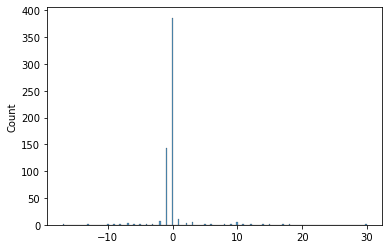

In [35]:
for col in common_columns - set(["death", "sex"]):
    print(col)
    sns.histplot(merged_data[f"old__{col}"] - merged_data[f"new__{col}"])
    plt.show()

    merged_data[col] = merged_data.apply(
        lambda x: return_second_if_not_nan(x[f"old__{col}"], x[f"new__{col}"]), axis=1
    )
    merged_data = merged_data.drop([f"old__{col}", f"new__{col}"], axis=1)

In [36]:
merged_data.head()

,launch_id,launch_blood_id,man_id,storm,ill_to_hosp,temp,chd,aks,cvd,news_1,resp_fail_5,news_5,resp_fail_out,il6,crp,leuk,neut,l,ldh,fer,d_dym,creat,glu,pcr,il6_dynam,crp_dynam,leuk_dynam,neut_dynam,l_dynam,ldh_dynam,fer_dynam,d_dym_dynam,creat_dynam,glu_dynam,pcr_dynam,news_dynam,treatment,com_index,ten_immortality,resp_dis_init,news_init,resp_dis_start,news_start,resp_dis_out,CT_init,ct1_init,ct2_init,CT_start,ct1_start,ct2_start,CT_out,ct1_out,ct2_out,CT_features,date_in,date_out,days_to_hosp,days_to_anticyt_treat,anticyt_treat,days_to_covid_plasma_treat,days_to_hemosorption,systemic_corticosteroids_usage,days_to_inv_IVL,days_to_EKMO,current_situation,BACT_sum,sex,death,l_3,fer_3,ldh_7,neut_3,neut_7,creat_7,glu_1,smell_taste_loss,pct,fer_5,il6_7,leuk_7,l_7,fer_7,d_dym_7,creat_1,leuk_3,il6_3,neut_5,weakness,pcr_9,glu_5,l_5,d_dym_5,leuk_1,il6_5,crp_1,l_1,age,pcr_3,severity,glu_3,crp_5,d_dym_1,neut_1,news_out,ldh_1,pcr_5,glu_7,pcr_1,il6_1,creat_5,imv_days,d_dym_3,ldh_3,crp_3,creat_3,crp_7,ldh_5,leuk_5,fer_1,days_at_hosp
0,10,104555,597619,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Этиотропная терапия,0.0,98.30,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1/24/2021,1/25/2021,2.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0,0.0,1.0,0.0,2.93,NaN,NaN,4.94,1.26,NaN,NaN,0.0,NaN,NaN,NaN,2.88,3.04,NaN,NaN,68.0,9.12,NaN,1.72,1.0,31.0,NaN,2.00,NaN,5.13,NaN,10.6,0.97,22.0,NaN,2.0,NaN,NaN,0.27,2.88,0.0,267.0,33.0,NaN,21.0,2.44,NaN,0.0,NaN,NaN,0.0,73.0,1.5,NaN,4.43,0.0,13.0
1,10,1046472,263436,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"4, 5",3.0,77.48,NaN,4.0,1.0,5.0,1.0,3.0,0.0,1.0,3.0,0.0,1.0,2.0,0.0,1.0,1.0,1/13/2021,"18,01,2021 22:20:00",6.0,8.00,6.0,NaN,8.0,0.0,NaN,NaN,1.0,0.0,0.0,0.0,1.66,NaN,NaN,2.53,NaN,NaN,NaN,0.0,NaN,NaN,NaN,4.97,NaN,NaN,NaN,85.0,4.97,24.34,3.20,1.0,NaN,NaN,2.44,1.74,7.51,19.80,151.5,1.56,51.0,NaN,2.0,NaN,29.6,1.28,4.97,0.0,NaN,NaN,NaN,NaN,120.80,NaN,0.0,2.05,NaN,127.8,NaN,NaN,NaN,6.55,NaN,16.0
2,10,1046474,695634,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"4, dex",4.0,53.39,NaN,6.0,2.0,6.0,2.0,1.0,0.0,1.0,2.0,0.0,1.0,2.0,0.0,1.0,1.0,1/10/2021,"17,01,2021 14:37:00",8.0,11.13,6.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.99,NaN,NaN,5.84,2.52,NaN,NaN,0.0,NaN,NaN,15.09,10.92,1.36,NaN,2.94,71.0,7.07,237.40,2.60,1.0,NaN,NaN,1.01,1.28,11.49,16.63,177.9,0.44,66.0,NaN,3.0,NaN,69.1,0.62,10.92,2.0,235.0,NaN,NaN,33.0,137.60,NaN,0.0,1.19,NaN,NaN,NaN,NaN,NaN,4.16,NaN,13.0
3,10,1046475,694025,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,77.48,1.0,3.0,2.0,7.0,0.0,1.0,0.0,1.0,3.0,0.0,1.0,3.0,0.0,1.0,1.0,NaN,NaN,11.0,NaN,NaN,16.0,NaN,0.0,NaN,NaN,1.0,0.0,0.0,0.0,1.07,NaN,NaN,5.58,6.82,64.0,5.7,0.0,NaN,NaN,42.23,9.79,2.09,NaN,6.45,65.0,6.98,59.01,6.10,1.0,NaN,5.5,1.01,6.45,6.01,53.99,23.1,0.49,49.0,NaN,3.0,5.9,2.4,0.97,5.13,0.0,NaN,NaN,5.3,NaN,50.37,72.0,0.0,0.81,NaN,146.4,NaN,1.4,NaN,7.91,NaN,19.0
4,10,1046476,74079,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,11.0,0.00,1.0,4.0,1.0,4.0,0.0,2.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0,NaN,NaN,12.0,13.00,6.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.02,NaN,243.0,7.57,2.13,59.0,5.1,0.0,NaN,NaN,NaN,4.10,1.44,98.6,1.12,213.0,8.88,23.98,4.09,0.0,NaN,7.4,2.25,2.45,12.08,19.65,247.7,1.25,61.0,32.0,3.0,5.5,20.3,3.81,10.35,0.0,NaN,NaN,7.9,24.0,178.80,235.0,0.0,6.96,NaN,100.9,270.0,12.0,NaN,7.49,NaN,10.0


### Add features
For analyses we can count dynamics (max-min, last day - first day, etc)

In [37]:
def aggregate(data, col_names, np_fun):
    series_list = []
    for col in col_names:
        series_list.append(list(data[col]))
    column = np_fun(series_list, axis=0)
    print(
        f"Column {col_names[:]}, non-nans cols: {sum(~np.isnan(column))}, nans cols: {sum(np.isnan(column))}"
    )
    return column


def first_observation(data):
    return data.fillna(method="bfill", axis=1).iloc[:, 0]


def last_observation(data):
    return data.fillna(method="ffill", axis=1).iloc[:, -1]


def return_dynamics(data):
    return last_observation(data) - first_observation(data)


def agg_col(cor_data, names, days, np_fun):
    for agg_col in names:
        cols = [agg_col + "_" + str(d) for d in days]
        cor_data[agg_col] = aggregate(cor_data, cols, np_fun)
        cor_data[agg_col + "_max_min"] = aggregate(
            cor_data, cols, np.nanmax
        ) - aggregate(cor_data, cols, np.nanmin)
        cor_data[agg_col + "_dynam"] = return_dynamics(cor_data[cols])
    return cor_data

In [38]:
## Aggregating
# names of cols with analyses on the 1, 3, 5, 7 days, these days
names_1357 = ["il6", "crp", "leuk", "neut", "l", "ldh", "fer", "d_dym", "creat", "glu"]
days_1357 = [1, 3, 5, 7]
# names of cols with analyses on the 1, 3, 5, 9 days and these days
names_1359 = ["pcr"]
days_1359 = [1, 3, 5, 9]

# news
names_news = ["news"]
days_news = [1, 5, "out"]

merged_data = agg_col(merged_data, names_1357, days_1357, np.nanmax)
merged_data = agg_col(merged_data, names_1359, days_1359, np.nanmin)
merged_data = agg_col(merged_data, names_news, days_news, np.nanmax)

Column ['il6_1', 'il6_3', 'il6_5', 'il6_7'], non-nans cols: 534, nans cols: 306
Column ['il6_1', 'il6_3', 'il6_5', 'il6_7'], non-nans cols: 534, nans cols: 306
Column ['il6_1', 'il6_3', 'il6_5', 'il6_7'], non-nans cols: 534, nans cols: 306
Column ['crp_1', 'crp_3', 'crp_5', 'crp_7'], non-nans cols: 779, nans cols: 61
Column ['crp_1', 'crp_3', 'crp_5', 'crp_7'], non-nans cols: 779, nans cols: 61
Column ['crp_1', 'crp_3', 'crp_5', 'crp_7'], non-nans cols: 779, nans cols: 61
Column ['leuk_1', 'leuk_3', 'leuk_5', 'leuk_7'], non-nans cols: 787, nans cols: 53
Column ['leuk_1', 'leuk_3', 'leuk_5', 'leuk_7'], non-nans cols: 787, nans cols: 53
Column ['leuk_1', 'leuk_3', 'leuk_5', 'leuk_7'], non-nans cols: 787, nans cols: 53
Column ['neut_1', 'neut_3', 'neut_5', 'neut_7'], non-nans cols: 787, nans cols: 53
Column ['neut_1', 'neut_3', 'neut_5', 'neut_7'], non-nans cols: 787, nans cols: 53
Column ['neut_1', 'neut_3', 'neut_5', 'neut_7'], non-nans cols: 787, nans cols: 53
Column ['l_1', 'l_3', 'l_

/home/achangalidi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: All-NaN axis encountered
  """


### Add info about days before admission

<AxesSubplot:xlabel='days_to_hosp', ylabel='Count'>

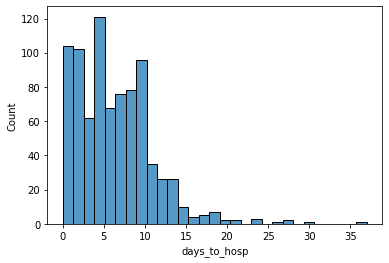

In [39]:
## Need days to hosp:
hosp_data = merged_data.dropna(axis=0, subset=["days_to_hosp"])
sns.histplot(hosp_data["days_to_hosp"])

In [40]:
def split_seven(x):
    if x > 7:
        return 1
    if x <= 7:
        return 0
    return np.nan

In [41]:
merged_data["week_to_hosp"] = merged_data.days_to_hosp.apply(split_seven)

In [43]:
sum(merged_data.age.isna())

0

## Save data

In [44]:
merged_data.to_csv(SAVE_EXTRA, sep="\t", index=False)

In [45]:
sum(merged_data.severity==0)

23